In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 24.5 MB/s 
     |████████████████████████████████| 179 kB 45.0 MB/s 
     |████████████████████████████████| 73 kB 2.3 MB/s 
     |████████████████████████████████| 45 kB 1.5 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.3 which is incompatible.


In [ ]:
import pandas as pd
from prophet import Prophet
from datetime import datetime


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PROJECT/uk.xlsx')
df.columns = ['ds', 'y']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
m = Prophet(interval_width=0.95) #by default is 80%
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df.head()

,ds,y
0,1970-01-01,6.366570
1,1971-01-01,9.444843
2,1972-01-01,7.071092
3,1973-01-01,9.196043
4,1974-01-01,16.043989


In [ ]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,2.271189,5.095379,18.667403,2.271189,2.271189,9.312133,9.312133,9.312133,9.312133,9.312133,9.312133,0.0,0.0,0.0,11.583322
1,1971-01-01,2.024256,4.637467,18.336114,2.024256,2.024256,9.404945,9.404945,9.404945,9.404945,9.404945,9.404945,0.0,0.0,0.0,11.429201
2,1972-01-01,1.777324,4.640816,18.431597,1.777324,1.777324,9.532160,9.532160,9.532160,9.532160,9.532160,9.532160,0.0,0.0,0.0,11.309484
3,1973-01-01,1.529715,3.904611,17.941609,1.529715,1.529715,9.253860,9.253860,9.253860,9.253860,9.253860,9.253860,0.0,0.0,0.0,10.783576
4,1974-01-01,1.282783,3.347518,17.728309,1.282783,1.282783,9.312133,9.312133,9.312133,9.312133,9.312133,9.312133,0.0,0.0,0.0,10.594916


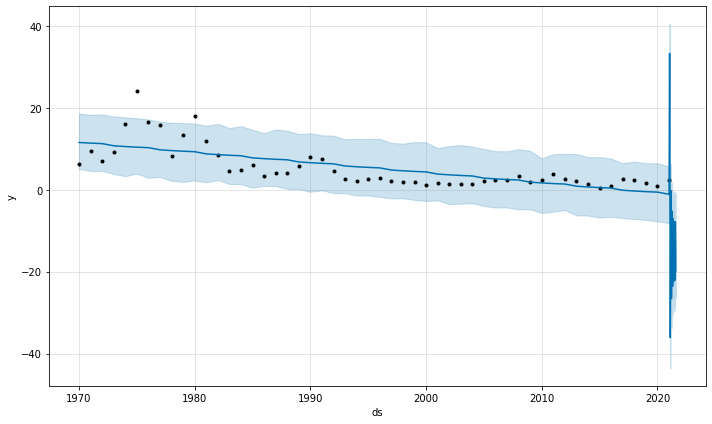

In [ ]:
plot1 = m.plot(forecast)

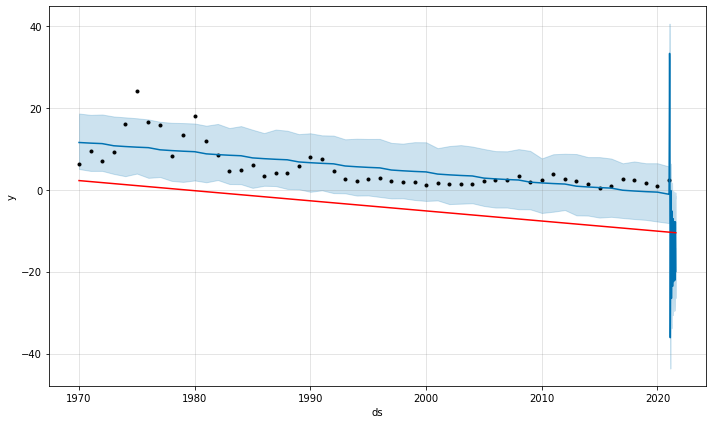

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

plot1 = m.plot(forecast)
a = add_changepoints_to_plot(plot1.gca(),m,forecast)

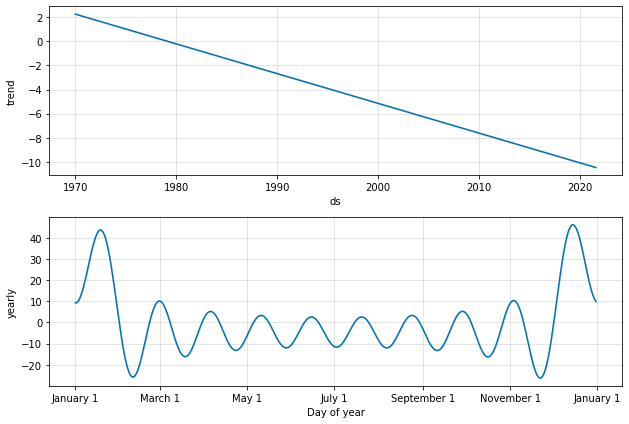

In [ ]:
plot2 = m.plot_components(forecast)

In [ ]:
df_merge = pd.merge(df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,1970-01-01,5.095379,18.667403,11.583322,6.366570
1,1971-01-01,4.637467,18.336114,11.429201,9.444843
2,1972-01-01,4.640816,18.431597,11.309484,7.071092
3,1973-01-01,3.904611,17.941609,10.783576,9.196043
4,1974-01-01,3.347518,17.728309,10.594916,16.043989


In [ ]:
 #calculate MAE between observed and predicted values 
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_01)

MAE: 2.706


In [ ]:
mape_01 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_01)

MAPE: 0.745


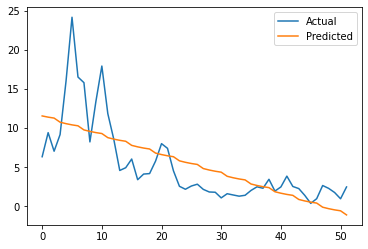

In [ ]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon='90 days')
# df_cv = cross_validation(m, initial='270 days', period='45 days', horizon = '90 days')
df_cv.head()

INFO:fbprophet:Making 50 forecasts with cutoffs between 1971-10-03 00:00:00 and 2020-10-03 00:00:00


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprop

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1972-01-01,12.550608,12.550608,12.550608,7.071092,1971-10-03
1,1973-01-01,8.077006,5.610204,10.536490,9.196043,1972-10-03
2,1974-01-01,9.592092,7.473373,11.712967,16.043989,1973-10-03
3,1975-01-01,15.166792,11.428457,19.171665,24.207294,1974-10-03
4,1976-01-01,24.208194,18.158816,30.501027,16.559526,1975-10-03


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,90 days,20.60517,4.539292,3.495357,0.951483,0.902102,0.86


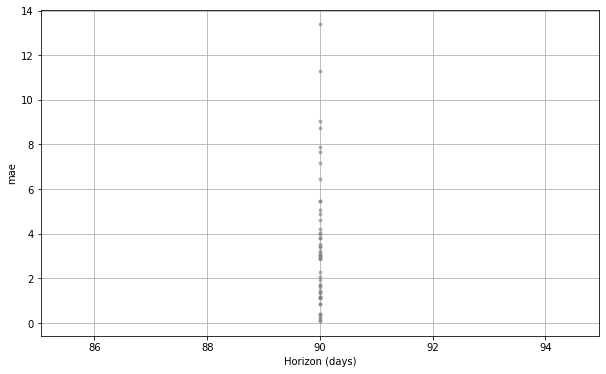

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

plot3 = plot_cross_validation_metric(df_cv, metric='mae')

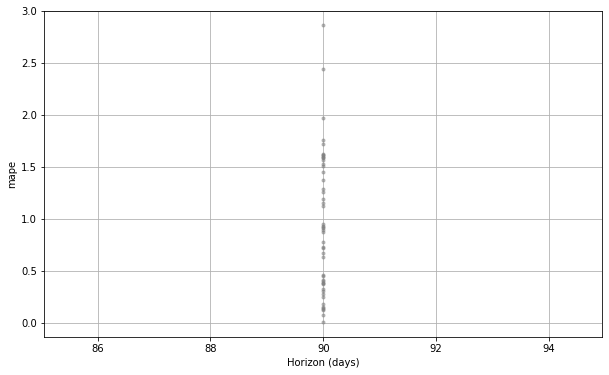

In [ ]:
plot4 = plot_cross_validation_metric(df_cv, metric='mape')